In [1]:
import math

In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [3]:
def _extract_title(name):
    if name.find('Mr.') > 0:
        return 'Mr'
    elif name.find('Mrs.') > 0:
        return 'Mrs'
    elif name.find('Master.') > 0:
        return 'Master'
    elif name.find('Miss.') > 0:
        return 'Miss'
    else:
        return None
    
def extract_title(df):
    df['Title'] = df.Name.apply(lambda n: _extract_title(n))

In [4]:
extract_title(train_df)
extract_title(test_df)


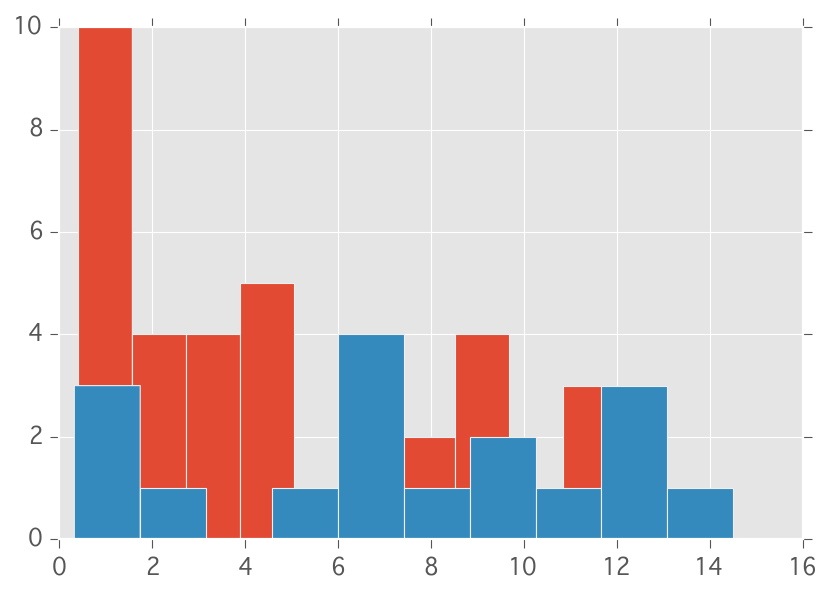

In [15]:
train_df[train_df.Title == 'Master'].Age.hist()
test_df[test_df.Title == 'Master'].Age.hist()

In [40]:
fn = train_df[train_df.Pclass==1][['Fare', 'SibSp']].apply(lambda r: r[0] / float(r[1] + 1), axis=1)
#train_df[(train_df.Pclass == 3)].Fare / train_df[(train_df.Pclass == 3)]

In [68]:
train_df[train_df.Pclass==1][['SibSp', 'Parch']].apply(lambda r: r[1])

SibSp    1
Parch    0
dtype: int64

In [88]:
family = train_df[train_df.Pclass==1][['SibSp', 'Parch']].apply(lambda r: max(1, r[0] + r[0]), axis=1)
fare1 = train_df[train_df.Pclass==1].Fare.values

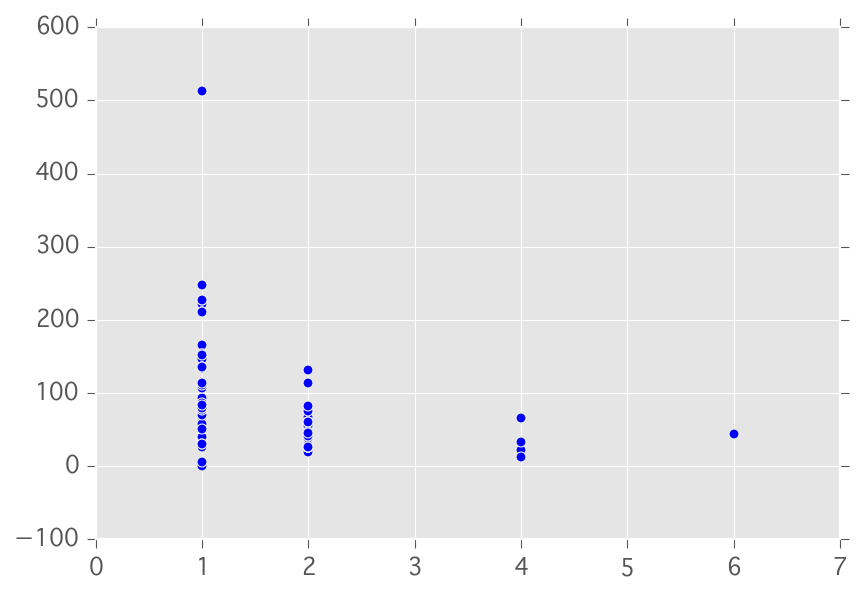

In [92]:
plt.scatter(family, fare1/family)

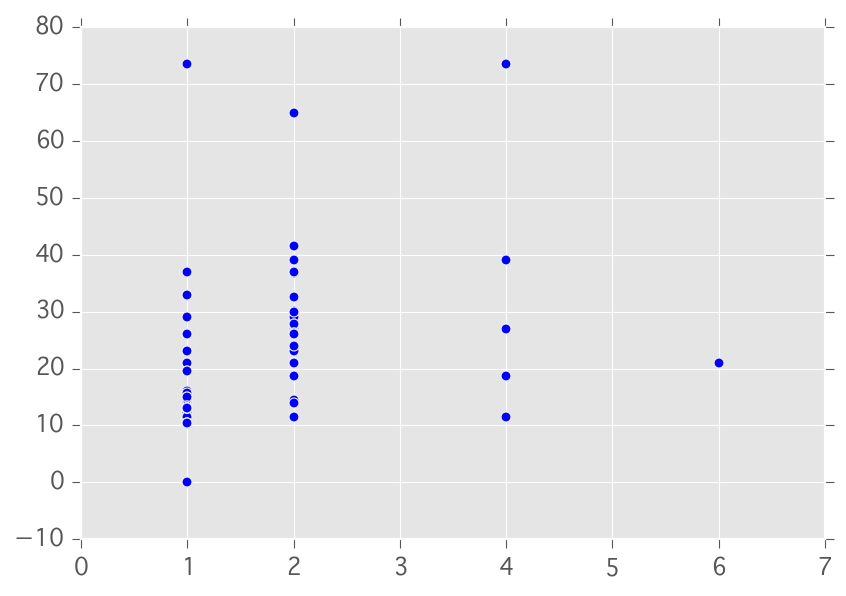

In [87]:
plt.scatter(family, fare1)

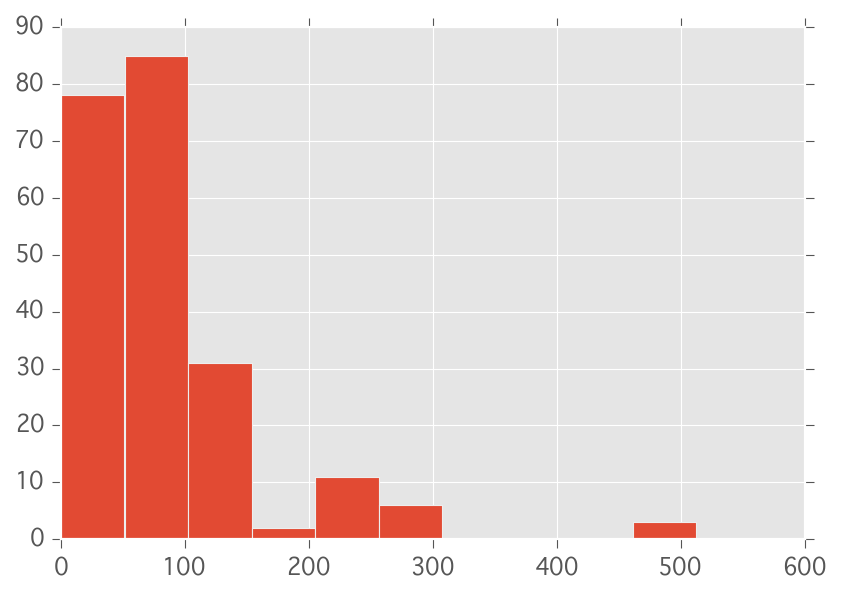

In [42]:
train_df[train_df.Pclass==1].Fare.hist()
#train_df[(train_df.Pclass == 3)].Fare / train_df[(train_df.Pclass == 3)]

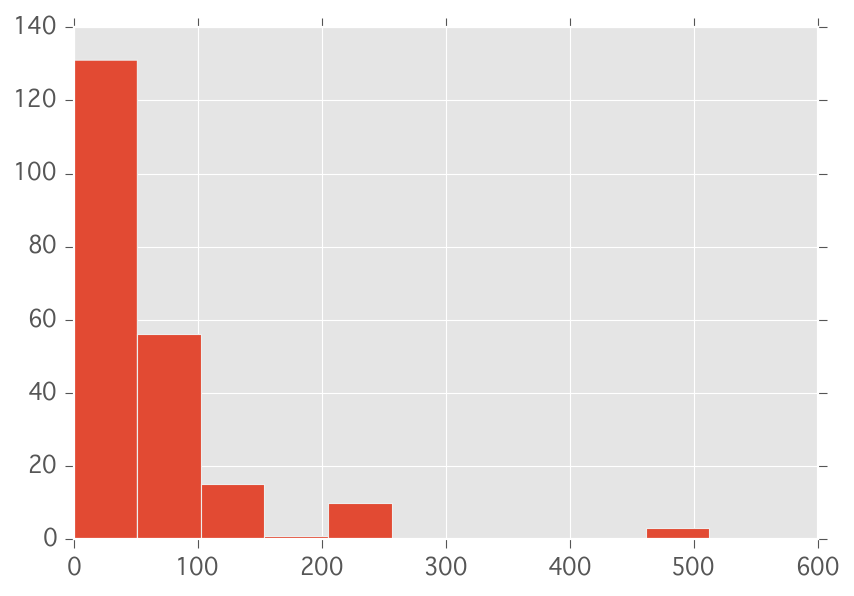

In [41]:
fn.hist()

In [5]:
train_df['CCabin'] = train_df.Cabin.fillna('NN')

In [6]:
def extract_deck(cabin_str):
    if cabin_str == 'NN':
        return 'NN'
    try:
        deck = cabin_str[0]
        return deck
    except:
        return 'X'

In [7]:
train_df.CCabin = train_df.Cabin.apply(lambda c: extract_deck(c))

In [93]:
train_df[(train_df.Sex == 'female') & (train_df.Age < 15)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,Mrs
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,Miss
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S,Miss
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S,Miss
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C,Miss
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,Miss
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S,Miss
111,112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,Miss
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S,Miss
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.00,2,2,W./C. 6608,34.3750,NaN,S,Miss


In [8]:
train_df.groupby(train_df['CCabin']).Survived.mean()

CCabin
A         0.466667
B         0.744681
C         0.593220
D         0.757576
E         0.750000
F         0.615385
G         0.500000
T         0.000000
X         0.299854
Name: Survived, dtype: float64

名前とPassengerIdは落とす

In [37]:
train_df['CSex'] = train_df.Sex.apply(lambda v: 0 if v == 'male' else 1)

In [38]:
train_df.Cabin.fillna('NN', inplace=True)
train_df['CCabin'] = train_df.Cabin.apply(lambda c: c[0])

In [39]:
train_df[train_df.Sex == 'female'].groupby(train_df.Embarked).Survived.mean()

Embarked
C           0.876712
Q           0.750000
S           0.689655
Name: Survived, dtype: float64

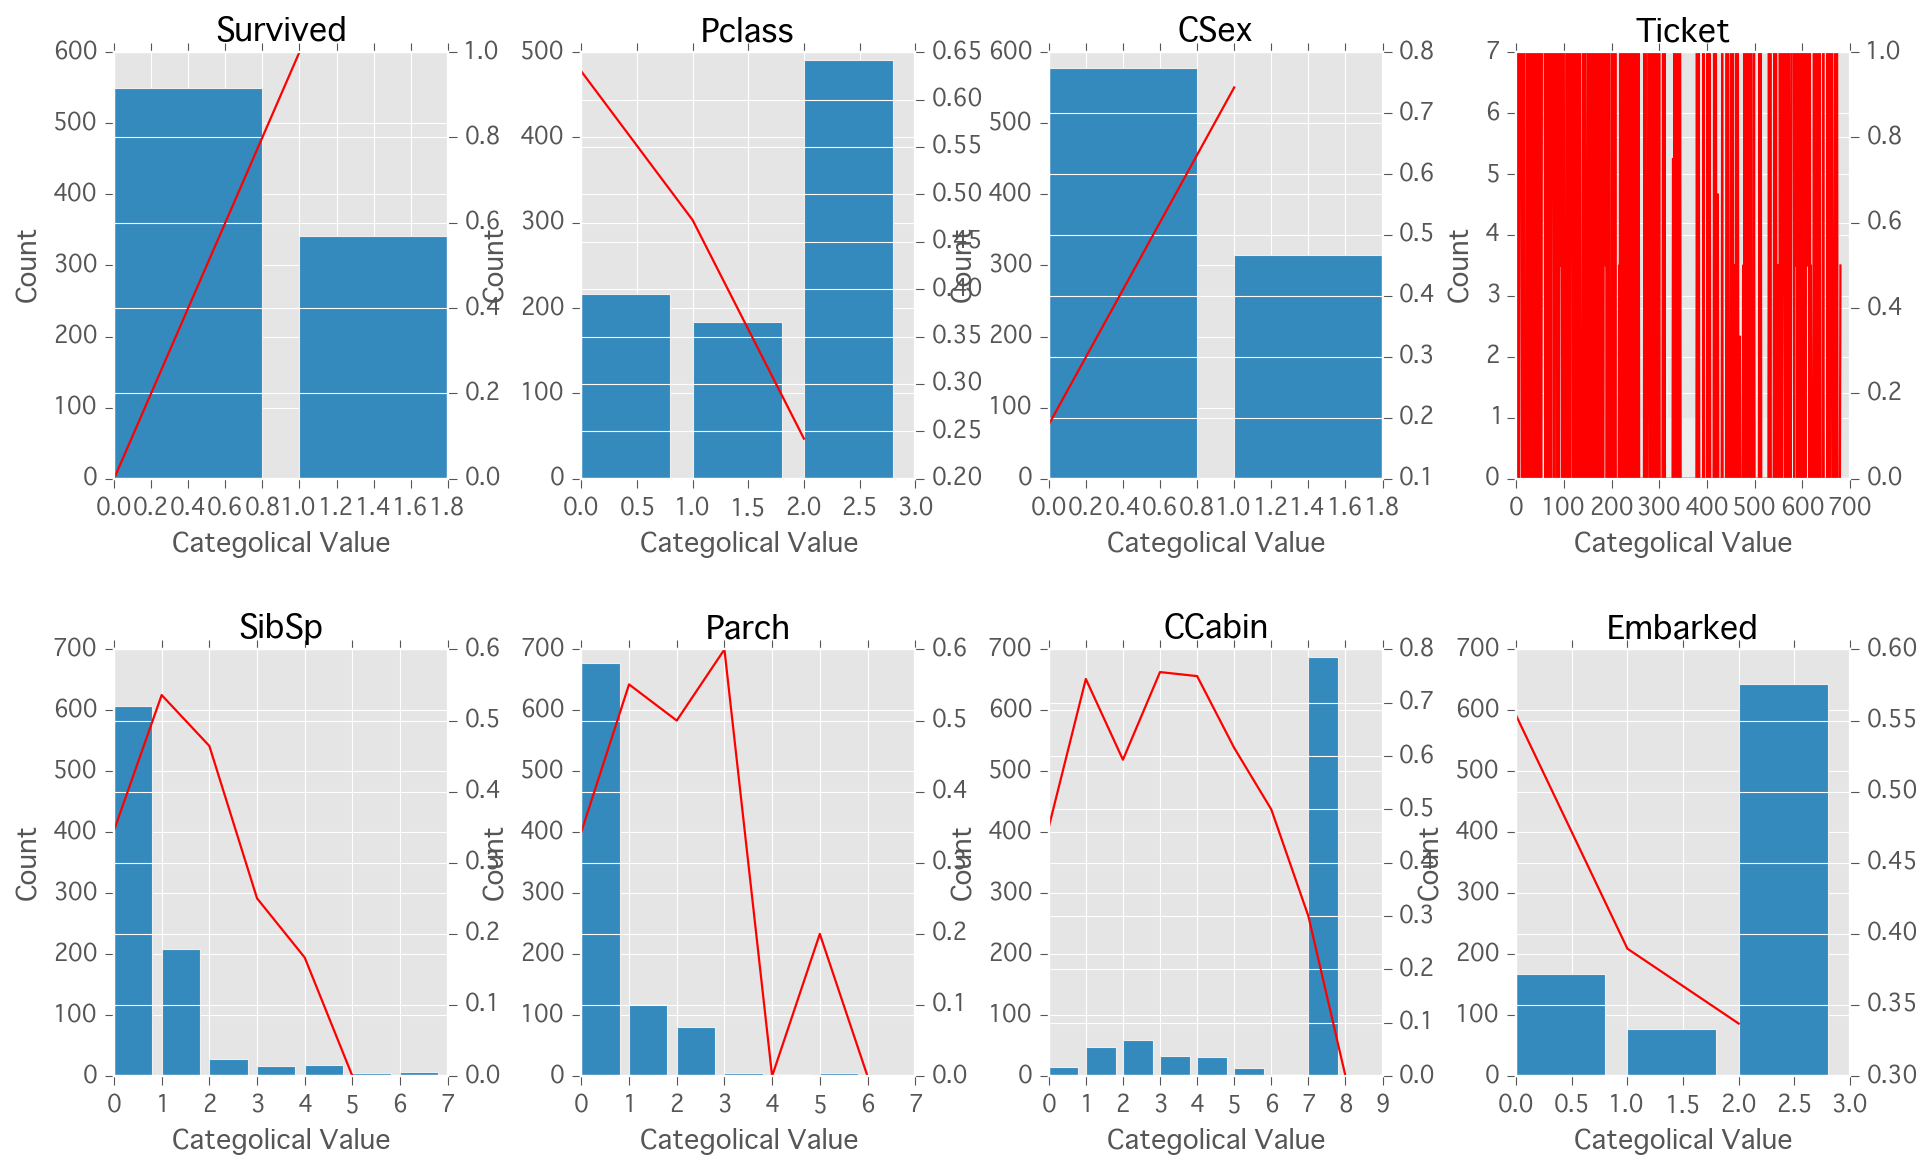

In [40]:
fig, axes=plt.subplots(figsize=(14, 8), nrows=2, ncols=4)
fig.subplots_adjust(hspace = 0.4)
fig.subplots_adjust(wspace = 0.4)
bar_width = 1.

header = ['Survived', 'Pclass', 'CSex', 'Ticket', 'SibSp', 'Parch', 'CCabin', 'Embarked']
for ix in np.arange(2):
    for ix2 in np.arange(4):
        col = header[ix*4 + ix2]
        ax = axes[ix][ix2]
        dd = train_df[col].groupby(train_df[col]).count()
        dm = train_df['Survived'].groupby(train_df[col]).mean()
        X = np.arange(len(dd.index))
        ax.bar(X, dd.values)
        ax.twinx().plot(X, dm.values, 'r-')
        ax.set_xlabel('Categolical Value')
        ax.set_ylabel('Count')
        ax.set_title(col)

In [14]:
#ax = plt.subplot()
#X = np.arange(1, 10)
#ax.bar(X, X*2)
#ax.twinx().plot(X, X*3)

In [15]:
# Ageの値が無い物については平均で埋めてしまう
train_df.Age.fillna(train_df.Age.mean(), inplace=True)
# 
#train_df.Cabin.fillna('--', inplace=True)

In [264]:
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CSex
0,0,3,male,22,1,0,A/5 21171,7.2500,NaN,S,0
1,1,1,female,38,1,0,PC 17599,71.2833,C85,C,1
2,1,3,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


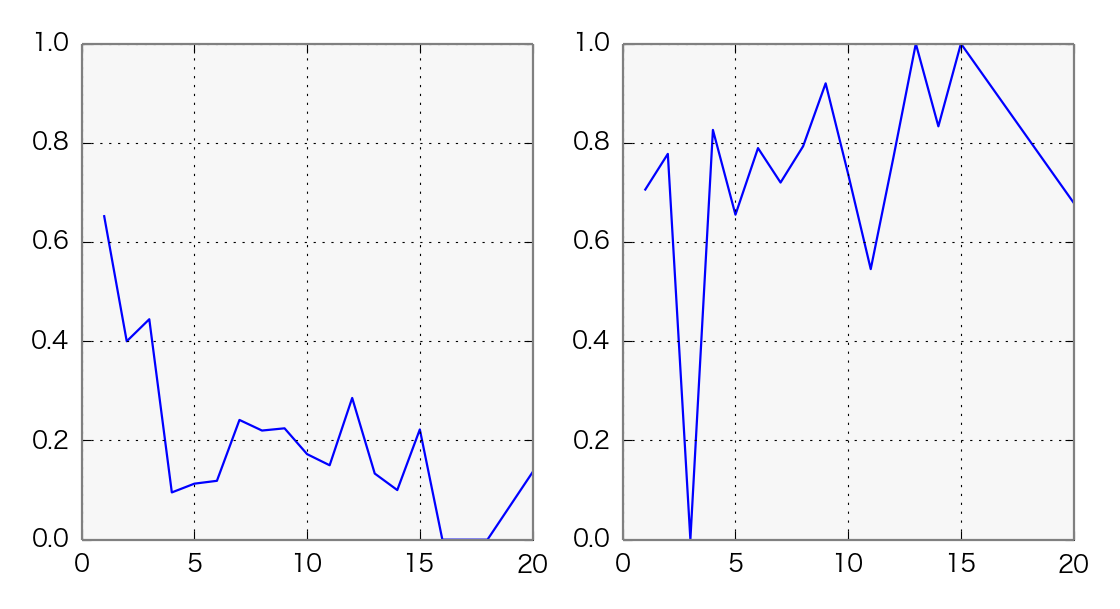

In [345]:
def plot_age_sex(df):
    col = 'Age'
    bins = np.linspace(df[col].min(), df[col].max(), 20)
    fig, axes=plt.subplots(figsize=(8, 4), nrows=1, ncols=2)
    m = df[df.Sex == 'male']
    m.groupby(np.digitize(m[col], bins)).Survived.mean().plot(ax=axes[0], ylim=(0, 1))
    f = df[df.Sex == 'female']
    f.groupby(np.digitize(f[col], bins)).Survived.mean().plot(ax=axes[1], ylim=(0, 1))
    #print(f.groupby(np.digitize(f[col], bins)).Survived.mean())
    #print(bins)
plot_age_sex(train_df)

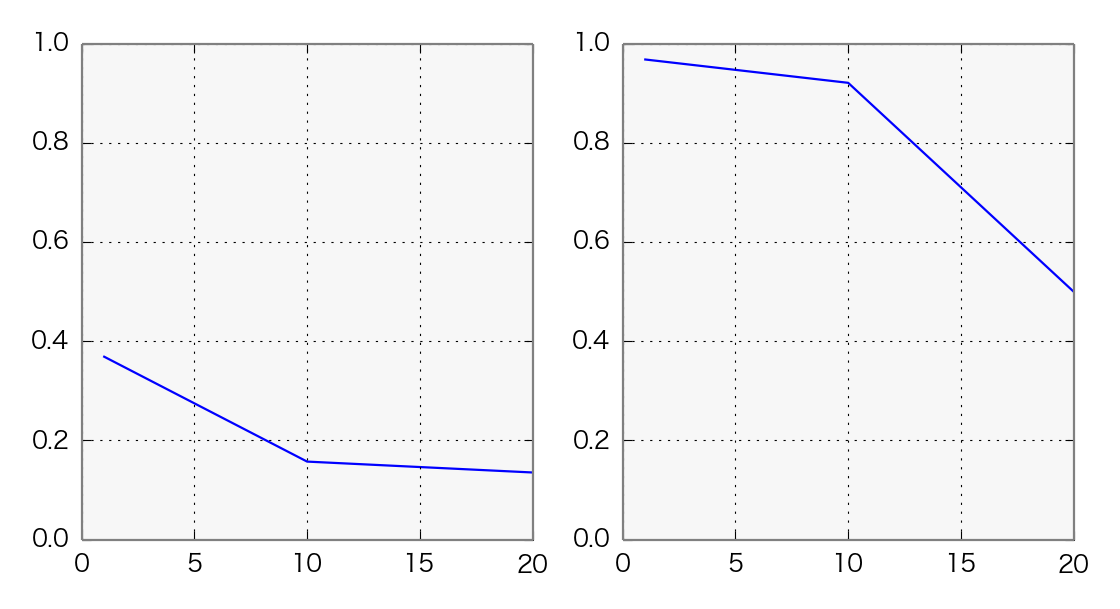

In [342]:
def plot_class_sex(df):
    col = 'Pclass'
    bins = np.linspace(df[col].min(), df[col].max(), 20)
    fig, axes=plt.subplots(figsize=(8, 4), nrows=1, ncols=2)
    m = df[df.Sex == 'male']
    m.groupby(np.digitize(m[col], bins)).Survived.mean().plot(ax=axes[0], ylim=(0, 1))
    f = df[df.Sex == 'female']
    f.groupby(np.digitize(f[col], bins)).Survived.mean().plot(ax=axes[1], ylim=(0, 1))
    #print(f.groupby(np.digitize(f[col], bins)).Survived.mean())
    #print(bins)
plot_class_sex(train_df)

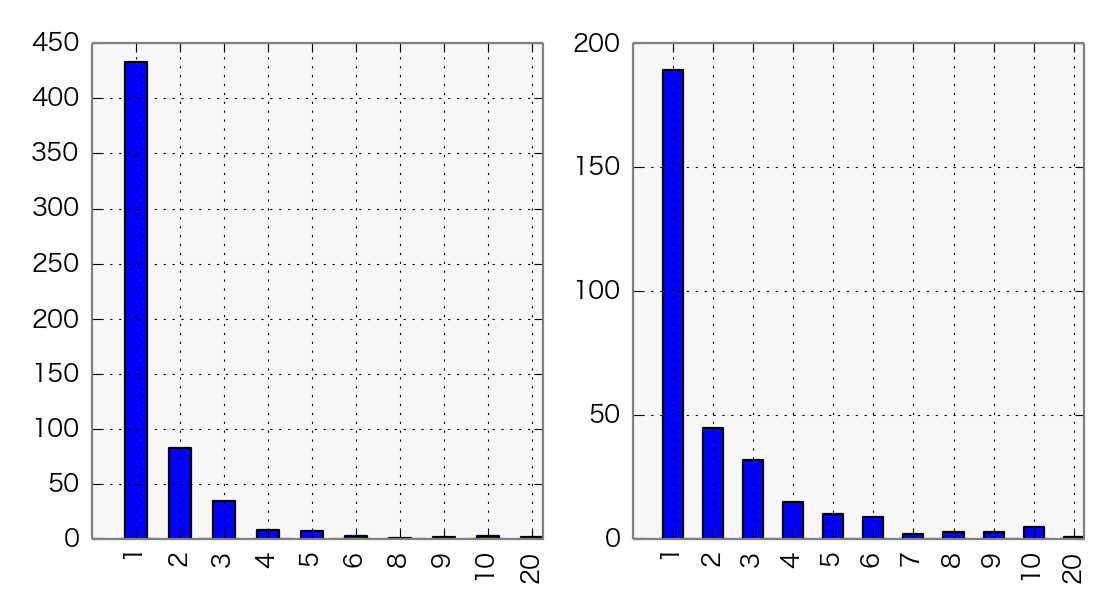

In [344]:
def plot_fare_sex(df):
    col = 'Fare'
    bins = np.linspace(df.Fare.min(), df.Fare.max(), 20)
    fig, axes=plt.subplots(figsize=(8, 4), nrows=1, ncols=2)
    m = df[df.Sex == 'male']
    m.groupby(np.digitize(m[col], bins)).Survived.count().plot(ax=axes[0], kind='bar')
    f = df[df.Sex == 'female']
    f.groupby(np.digitize(f[col], bins)).Survived.count().plot(ax=axes[1], kind='bar')
    #print(f.groupby(np.digitize(f[col], bins)).Survived.mean())
    #print(bins)
plot_fare_sex(train_df)

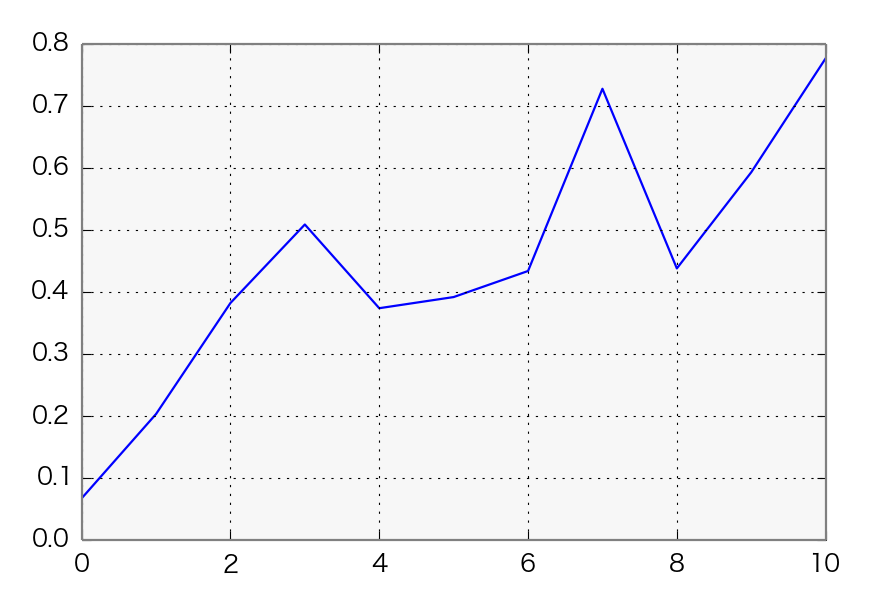

In [265]:
bins = np.linspace(train_df.Age.min(), train_df.Age.max(), 10)
train_df.groupby(np.digitize(train_df['Fare'], bins)).Survived.mean().plot()

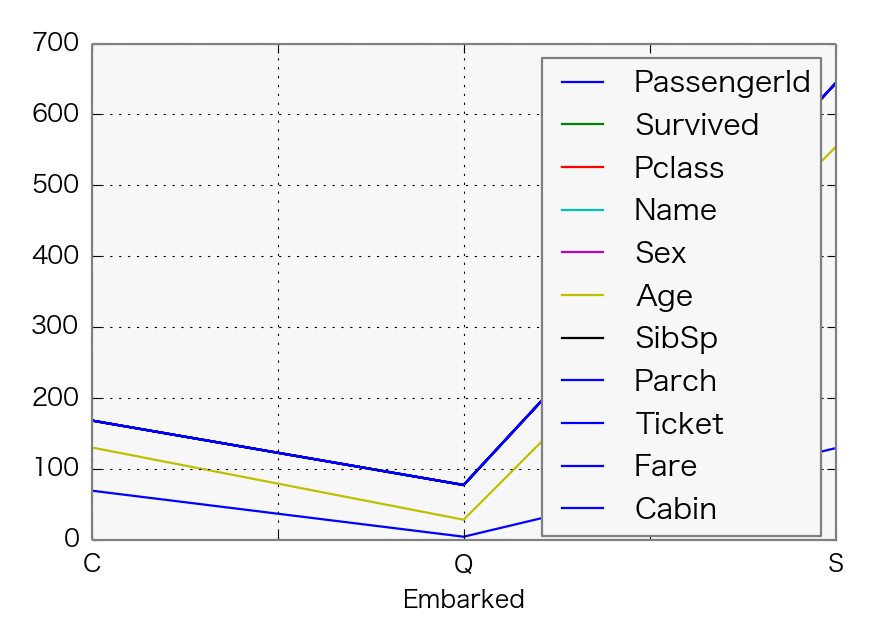

In [424]:
def plot_class_embarked(df):
    df.groupby('Embarked').count().plot()
plot_class_embarked(train_df)

In [430]:
train_df.groupby(['Embarked', 'Pclass']).count()

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Ticket  \
Embarked Pclass                                                                
C        1                85        85    85   85   74     85     85      85   
         2                17        17    17   17   15     17     17      17   
         3                66        66    66   66   41     66     66      66   
Q        1                 2         2     2    2    2      2      2       2   
         2                 3         3     3    3    2      3      3       3   
         3                72        72    72   72   24     72     72      72   
S        1               127       127   127  127  108    127    127     127   
         2               164       164   164  164  156    164    164     164   
         3               353       353   353  353  290    353    353     353   

                 Fare  Cabin  
Embarked Pclass               
C        1         85     66  
         2         17      2  
         3         66      1  
Q        1          2      2  
         2          3      1  
         3         72      1  
S        1        127    106  
         2        164     13  
         3        353     10

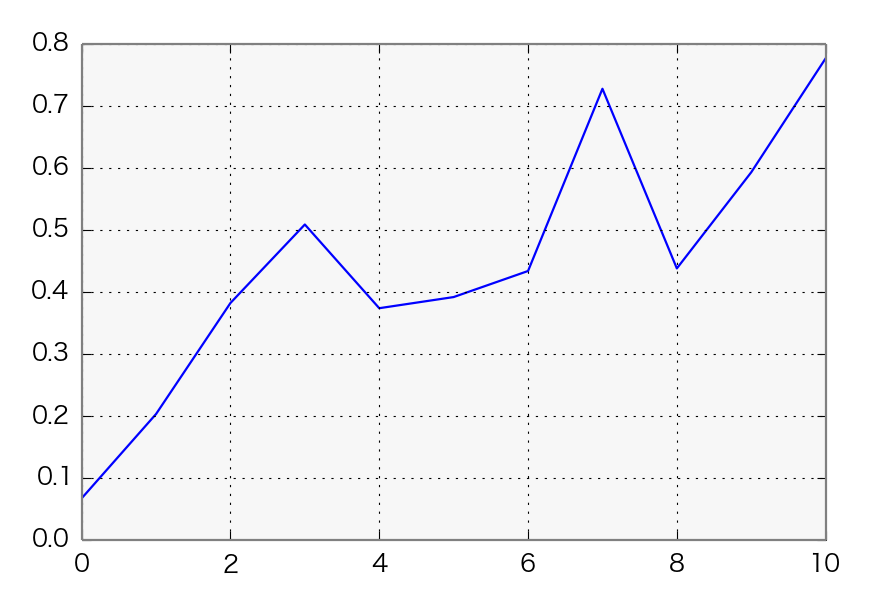

In [333]:
train_df.groupby(np.digitize(train_df['Fare'], bins)).Survived.mean().plot()

In [319]:
g = train_df.groupby([train_df['CCabin'], train_df['Pclass']])

In [421]:
g = train_df.groupby(train_df['CCabin'])

KeyError: 'CCabin'

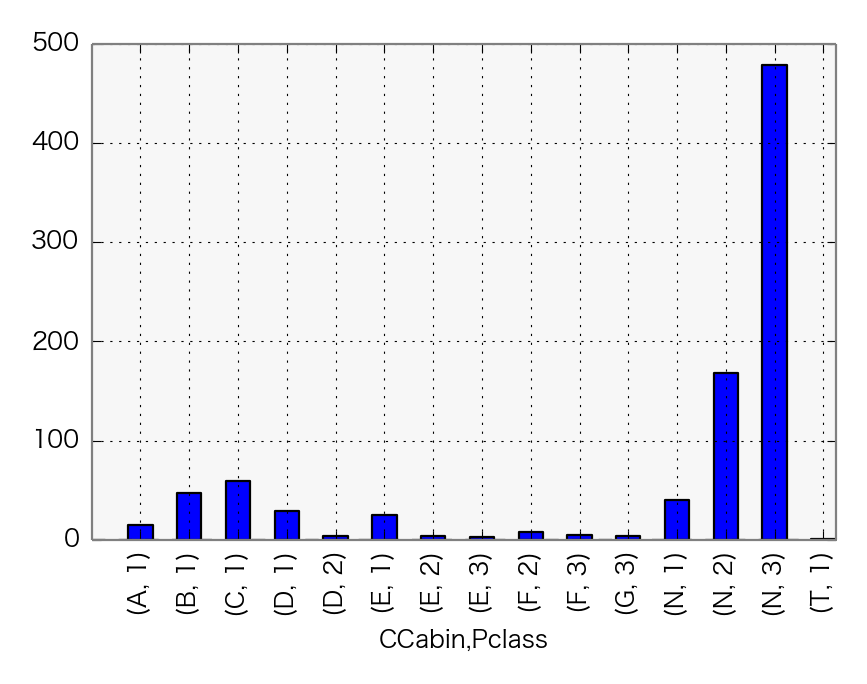

In [323]:
g.Survived.count().plot(kind='bar')

In [338]:
train_df[['Pclass', 'Sex', 'Cabin', 'Fare']].sort('Fare')

,Pclass,Sex,Cabin,Fare
271,3,male,NaN,0.0000
597,3,male,NaN,0.0000
302,3,male,NaN,0.0000
633,1,male,NaN,0.0000
277,2,male,NaN,0.0000
413,2,male,NaN,0.0000
674,2,male,NaN,0.0000
263,1,male,B94,0.0000
466,2,male,NaN,0.0000
732,2,male,NaN,0.0000


PClass毎のFareの平均

In [350]:
train_df[train_df.Fare > 0].groupby('Pclass').Fare.mean()

Pclass
1         86.148874
2         21.358661
3         13.787875
Name: Fare, dtype: float64

In [419]:
#train_df[['Fare', 'SibSp']].sort('Fare')